In [1]:
import pandas as pd
labels_csv  = pd.read_csv(r'C:\Users\abhi1\Desktop\CNN\labels.csv')
print(labels_csv.describe())
labels_csv.head(5)

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126


,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


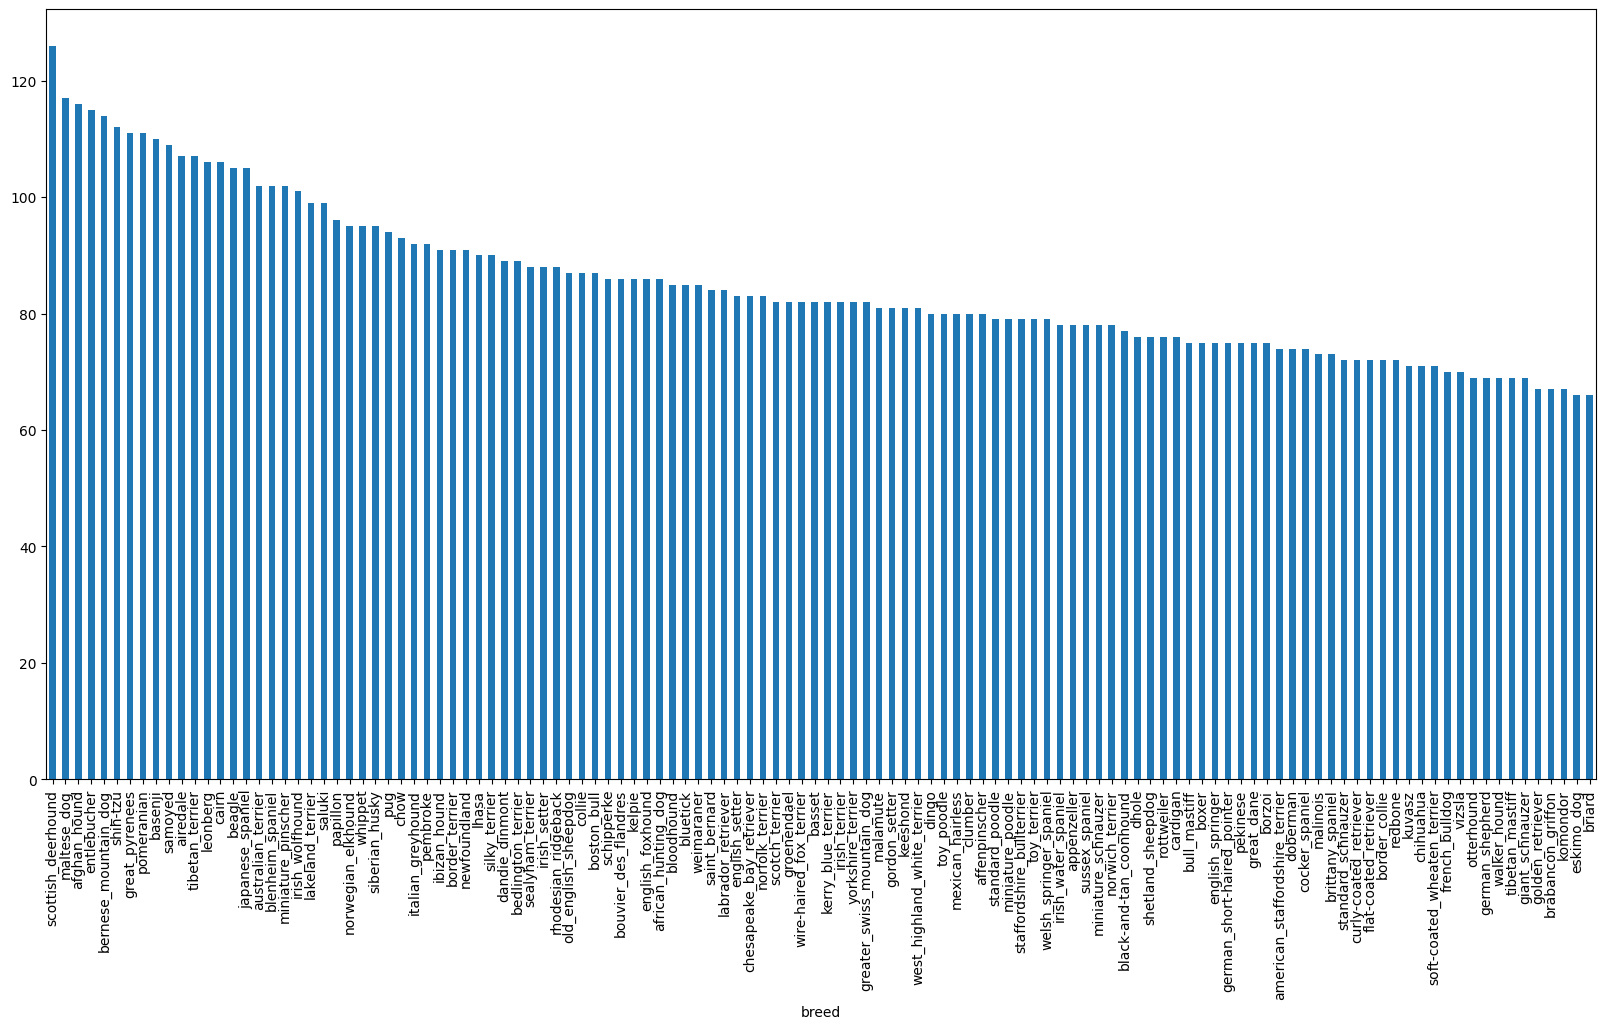

In [2]:
# How many images are there of each breed?
labels_csv["breed"].value_counts().plot.bar(figsize=(20, 10));

In [3]:
# no of images of each breed
labels_csv["breed"].value_counts().median()

82.0

so basically ipython is a library to display image in output cell of jupiter notebook


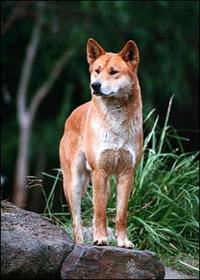

In [4]:
from IPython.display import Image
Image(r"C:\Users\abhi1\Desktop\CNN\train\00a338a92e4e7bf543340dc849230e75.jpg")

now we will create path names for all images from there image ID's 

In [5]:
filenames = ["C:/Users/abhi1/Desktop/CNN/train/"+image_id+".jpg" for image_id in labels_csv["id"]]
filenames[:5]

['C:/Users/abhi1/Desktop/CNN/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'C:/Users/abhi1/Desktop/CNN/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'C:/Users/abhi1/Desktop/CNN/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'C:/Users/abhi1/Desktop/CNN/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'C:/Users/abhi1/Desktop/CNN/train/0021f9ceb3235effd7fcde7f7538ed62.jpg']

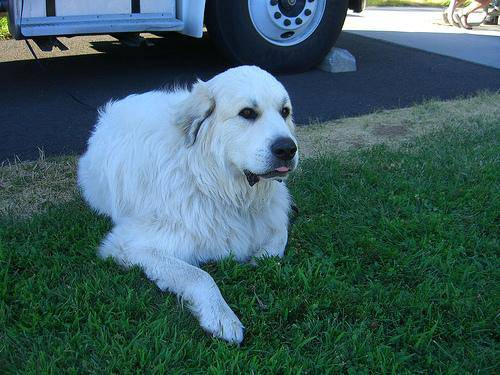

In [6]:
Image(filenames[3001])

In [7]:
# Check whether number of filenames matches number of actual image files
import os
if len(os.listdir("C:/Users/abhi1/Desktop/CNN/train/")) == len(filenames):
  print("Filenames match actual amount of files!")
else:
  print("Filenames do not match actual amount of files")

Filenames match actual amount of files!


We convert a Pandas Series to a NumPy array because most ML and deep‑learning libraries (e.g. scikit‑learn, TensorFlow/Keras, PyTorch) expect their inputs—and especially their label vectors—to be plain ndarrays, not Pandas objects.


In [8]:
import numpy as np
labels = labels_csv["breed"].to_numpy()
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [9]:
# Find the unique label values
unique_breeds = np.unique(labels)
len(unique_breeds)
# unique_breeds

120

In [10]:
print(labels[0])
labels[0]== unique_breeds  # This is comparing the first label (labels[0]) to the entire unique_breeds list or array.


boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

Now we turn every label into boolean array

In [11]:
boolean_labels = [label == np.array(unique_breeds) for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

np.where(condition) -> returns indices where condition is true

np.where() returns a tuple, where the first element [0] is an array of indices where the condition is True

To get the actual index value, we use another [0].

In [12]:
print(labels[0]) # original label
print(np.where(unique_breeds == labels[0])[0][0]) # index where labels occurs
                                 #.argmax() returns the index of the maximum value in an array.
print(boolean_labels[0].argmax()) # index where label occurs in boolean array  #more optimized way then above to find index
print(boolean_labels[0].astype(int)) # there will be a 1 where the sample label occurs

boston_bull
19
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


Since we're working with 10,000+ images, it's a good idea to work with
a portion of them to make sure things are working before training on them all.

This is because computing with 10,000+ images could take a fairly long time. And our goal when working through machine learning projects is to reduce the time between experiments.

Let's start experimenting with 1000 and increase it as we need.

In [13]:
# Setup X & y variables
X = filenames
y = boolean_labels
NUM_IMAGES = 1000

In [14]:
# Import train_test_split from Scikit-Learn
from sklearn.model_selection import train_test_split

# Split them into training and validation using NUM_IMAGES
X_train, X_val, y_train, y_val = train_test_split (X[:NUM_IMAGES],
                                                  y[:NUM_IMAGES],
                                                  test_size=0.2,
                                                  random_state=42)

len(X_train), len(y_train), len(X_val), len(y_val)

(800, 800, 200, 200)

## *Preprocessing images (turning images into Tensors)*


Our labels are in numeric format but our images are still just file paths.
Since we're using TensorFlow, our data has to be in the form of Tensors.

A Tensor is a way to represent information in numbers. If you're familar with NumPy arrays (you should be), a Tensor can be thought of as a combination of NumPy arrays, except with the special ability to be used on a GPU.

Because of how TensorFlow stores information (in Tensors), it allows machine learning and deep learning models to be run on GPUs (generally faster at numerical computing).

To preprocess our images into Tensors we're going to write a function which does a few things:

1-Takes an image filename as input.

2- Uses TensorFlow to read the file and save it to a variable, image.

3-Turn our image (a jpeg file) into Tensors.

4-Resize the image to be of shape (224, 224).

5-Return the modified image.

6-A good place to read about this type of function is the TensorFlow documentation on loading images.

You might be wondering why (224, 224), which is (heigh, width). It's because this is the size of input our model (we'll see this soon) takes, an image which is (224, 224, 3).

What? Where's the 3 from? We're getting ahead of ourselves but that's the number of colour channels per pixel, red, green and blue.

Let's make this a little more concrete

In [15]:
# Convert image to NumPy array  # because models like CNNs don't understand file paths — they only understand numbers.
from matplotlib.pyplot import imread                               #And numbers are what a CNN needs to learn patterns.
image = imread(filenames[42]) # read in an image
image.shape

(257, 350, 3)

We convert NumPy to Tensor because TensorFlow models only work with Tensors, which support GPU usage and training with gradients. CNNs need image data in tensor format,

### why tensor?
Tensors are like NumPy arrays, but with extra abilities:

They can run on GPU/TPU (faster training!)

They support automatic differentiation (for training with backprop)

They work efficiently in the TensorFlow computation graph

In [16]:
import tensorflow as tf
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  89],
        [ 76, 124,  76],
        [ 63, 111,  61],
        ...,
        [ 77, 133,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  75],
        [ 67, 114,  68],
        [ 63, 110,  64],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 132,  84]]], dtype=uint8)>

📦 Final Output:
A Tensor of shape (224, 224, 3) with pixel values between 0 and 1, ready to go into a CNN.

process_image() -> takes an image path, reads it, converts it to a normalized 224x224x3 Tensor that our CNN model can train on.

In [17]:
# Define image size
IMG_SIZE = 224

def process_image(image_path):
  """
  Takes an image file path and turns it into a Tensor.
  """
  # Read in image file
  image = tf.io.read_file(image_path)
  # Turn the jpeg image into numerical Tensor with 3 colour channels (Red, Green, Blue)
  image = tf.image.decode_jpeg(image, channels=3)
  # Convert the colour channel values from 0-225 values to 0-1 values
  image = tf.image.convert_image_dtype(image, tf.float32)
  # Resize the image to our desired size (224, 244)
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])
  return image

In [18]:
# Create a simple function to return a tuple (image, label)
def get_image_label(image_path, label):
  """
  Takes an image file path name and the associated label,
  processes the image and returns a tuple of (image, label).
  """
  image = process_image(image_path)
  return image, label

In [19]:
get_image_label(X[42],y[42])


(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.3264178 , 0.5222886 , 0.3232816 ],
         [0.2537167 , 0.44366494, 0.24117759],
         [0.25699762, 0.4467087 , 0.23893751],
         ...,
         [0.29325107, 0.5189916 , 0.3215547 ],
         [0.29721776, 0.52466875, 0.33030328],
         [0.2948505 , 0.5223015 , 0.33406618]],
 
        [[0.25903144, 0.4537807 , 0.27294815],
         [0.24375686, 0.4407019 , 0.2554778 ],
         [0.2838985 , 0.47213382, 0.28298813],
         ...,
         [0.2785345 , 0.5027992 , 0.31004712],
         [0.28428748, 0.5108719 , 0.32523635],
         [0.28821915, 0.5148036 , 0.32916805]],
 
        [[0.20941195, 0.40692952, 0.25792548],
         [0.24045378, 0.43900946, 0.2868911 ],
         [0.29001117, 0.47937486, 0.32247734],
         ...,
         [0.26074055, 0.48414773, 0.30125174],
         [0.27101526, 0.49454468, 0.32096273],
         [0.27939945, 0.5029289 , 0.32934693]],
 
        ...,
 
        [[0.00634795, 0.03442048

Now we've got a simple function to turn our image file path names and their associated labels into tuples (we can turn these into Tensors next), we'll create a function to make data batches.

Because we'll be dealing with 3 different sets of data (training, validation and test), we'll make sure the function can accomodate for each set.

We'll set a default batch size of 32 because according to Yann Lecun (one of the OG's of deep learning), friends don't let friends train with batch sizes over 32.

  Creates batches of data out of image (x) and label (y) pairs.
  Shuffles the data if it's training data but doesn't shuffle it if it's validation data.
  Also accepts test data as input (no labels).

In [20]:
BATCH_SIZE = 32
def create_data_batches(x, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  # If the data is a test dataset, we probably don't have labels
  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x))) #It converts a list of image file paths into a TensorFlow dataset where each element is a separate image path, ready for processing.
    data_batch = data.map(process_image).batch(BATCH_SIZE)  #with the help of .map , we will send file path of everyimage to process_image fuction to convert image path to actual required image 
    return data_batch

  # If the data if a valid dataset, we don't need to shuffle it
  elif valid_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), # filepaths
                                               tf.constant(y))) # labels
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    # If the data is a training dataset, we shuffle it
    print("Creating training data batches...")
    # Turn filepaths and labels into Tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x),
                                              tf.constant(y)))

    # Shuffling pathnames and labels before mapping image processor function is faster than shuffling images
    data = data.shuffle(buffer_size=len(x))

    # Create (image, label) tuples (this also turns the image path into a preprocessed image)
    data = data.map(get_image_label)

    # Turn the data into batches
    data_batch = data.batch(BATCH_SIZE)
  return data_batch

In [21]:
# Create training and validation data batches
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data=True)

Creating training data batches...
Creating validation data batches...


 x = feature_extractor_layer(inputs)    ##YHA APAN INPUTS (YANI PLACEHOLDER PASS KR RHE H ) ISILIYE ERRROR AA RA H


x = keras.layers.Lambda(lambda x: feature_extractor_layer(x))(inputs)

This tells Keras:

"Hey, treat this feature extractor like a regular layer in the model. Don’t try to run it yet, just remember what to do when the real data comes."

In [22]:
import tensorflow as tf
import tensorflow_hub as hub
IMG_SIZE = 224

# def create_model():
#     # Define the input shape
#     inputs = tf.keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3), name="input_image")

#     # Load feature extractor from TF Hub inside the model, and pass inputs through it
#     feature_extractor_layer = hub.KerasLayer(
#         "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4",
#         trainable=False,
#         name="mobilenet_v2"
#     )
                                               #ERROR#ERROR#ERROR#ERROR#ERROR#ERROR#ERROR#ERROR
#     # Apply feature extractor
#     x = feature_extractor_layer(inputs)    ##YHA APAN INPUTS (YANI PLACEHOLDER PASS KR RHE H ) ISILIYE ERRROR AA RA H

#     # Optional FC layers
#     x = tf.keras.layers.Dense(256, activation='relu')(x)
#     x = tf.keras.layers.Dropout(0.3)(x)

#     # Final classification layer
#     outputs = tf.keras.layers.Dense(len(unique_breeds), activation='softmax')(x)

#     # Build model
#     model = tf.keras.Model(inputs=inputs, outputs=outputs)

#     # Compile model
#     model.compile(
#         loss='categorical_crossentropy',
#         optimizer='adam',
#         metrics=['accuracy']
#     )

#     return model

import keras
import tensorflow as tf
import tensorflow_hub as hub

IMG_SIZE = 224

def create_model():
    # Input layer  #This is just a "box" saying "hey, I'm ready to receive an image."
    #This inputs variable doesn’t hold an actual image.
    #It represents the image (like a blank box), and that’s why it’s called symbolic.
    inputs = keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3), name="input_image")  

    # Feature extractor layer from TF Hub
    #Think of this layer as a very smart camera that turns your image into a long meaningful feature vector.
    feature_extractor_layer = hub.KerasLayer(     
        "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4",
        trainable=False,
        name="mobilenet_v2"
    )

    # Apply extractor
    #what you get? -> A vector of numbers that summarize the image in a way that’s meaningful to the model.
    x = keras.layers.Lambda(lambda x: feature_extractor_layer(x))(inputs)


    # Fully connected layers
    x = keras.layers.Dense(256, activation='relu')(x)
    #Helps prevent overfitting by randomly turning off 30% of neurons during training.
    x = keras.layers.Dropout(0.3)(x)

    # Output layer
    #softmax ensures all outputs add up to 1 (probabilities).
    outputs = keras.layers.Dense(len(unique_breeds), activation='softmax')(x)

    #You connect the whole pipeline:
    #From input image → feature extractor → dense layer → final breed prediction
    model = keras.Model(inputs=inputs, outputs=outputs)

    # Compile
    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model



In [23]:
model = create_model()
model.summary()  # Optional: visualize the model architecture

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_image (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lambda (Lambda)                 │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 120)            │        30,840 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 358,776 (1.37 MB)

 Trainable params: 358,776 (1.37 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
# Create early stopping (once our model stops improving, stop training)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=3) # stops after 3 rounds of no improvements

In [25]:
NUM_EPOCHS = 100
def train_model():
  """
  Trains a given model and returns the trained version.
  """
  model = create_model()


  # Fit the model to the data passing it the callbacks we created
  model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data=val_data,
            validation_freq=1, # check validation metrics every epoch
            callbacks=[early_stopping])

  return model

In [26]:
model = train_model()


Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 12s 352ms/step - accuracy: 0.0637 - loss: 4.7567 - val_accuracy: 0.2650 - val_loss: 3.8900
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 310ms/step - accuracy: 0.4438 - loss: 2.9260 - val_accuracy: 0.4450 - val_loss: 2.7963
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 310ms/step - accuracy: 0.7009 - loss: 1.3761 - val_accuracy: 0.5950 - val_loss: 1.9006
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 309ms/step - accuracy: 0.8724 - loss: 0.6852 - val_accuracy: 0.6050 - val_loss: 1.5741
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 315ms/step - accuracy: 0.9408 - loss: 0.3868 - val_accuracy: 0.6800 - val_loss: 1.2975
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 324ms/step - accuracy: 0.9564 - loss: 0.2536 - val_accuracy: 0.7000 - val_loss: 1.2572
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 314ms/step - accuracy: 0.9762 - loss: 0.1715 - val_accuracy: 0.7450 - val_loss: 1.1499
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 310ms/step - accuracy: 0.9783 - loss: 0.1321 - val_acc

In [27]:
# test_loss, test_acc = model.evaluate(test)
# print(f"Test Accuracy: {test_acc:.4f}, Test Loss: {test_loss:.4f}")

# Make predictions on the validation data (not used to train on)
predictions = model.predict(val_data, verbose=1) # verbose shows us how long there is to go
predictions


7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 311ms/step


array([[2.6220398e-03, 2.2169482e-04, 9.0529147e-04, ..., 3.6697238e-05,
        1.2988130e-04, 1.7008667e-04],
       [2.6696783e-03, 1.4520721e-03, 1.0795150e-03, ..., 3.3912630e-04,
        6.6763093e-03, 3.3693672e-05],
       [1.3709063e-06, 8.1737853e-05, 1.0434702e-05, ..., 4.0236326e-05,
        5.0571911e-05, 2.6116002e-04],
       ...,
       [6.5242915e-05, 5.3355575e-04, 3.9833161e-05, ..., 2.1908683e-05,
        1.6262912e-04, 3.3113656e-06],
       [7.2538758e-05, 7.0625074e-06, 1.4585355e-05, ..., 2.6126095e-06,
        1.5126393e-06, 7.9185585e-05],
       [9.3071365e-05, 1.3178830e-05, 7.9060221e-05, ..., 1.3891490e-03,
        1.8681255e-04, 3.8365873e-05]], dtype=float32)

In [28]:
predictions.shape

(200, 120)

In [29]:
import numpy as np

y_pred = np.argmax(predictions, axis=1)



In [30]:
y_true = []
for _, labels in val_data:
    y_true.extend(np.argmax(labels.numpy(), axis=1))


In [31]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_true, y_pred)
print(f"Validation Accuracy: {accuracy:.2f}")


Validation Accuracy: 0.71


In [32]:
# Turn prediction probabilities into their respective label (easier to understand)
def get_pred_label(prediction_probabilities):
  """
  Turns an array of prediction probabilities into a label.
  """
  return unique_breeds[np.argmax(prediction_probabilities)]

# Get a predicted label based on an array of prediction probabilities
pred_label = get_pred_label(predictions[0])
pred_label

'cairn'

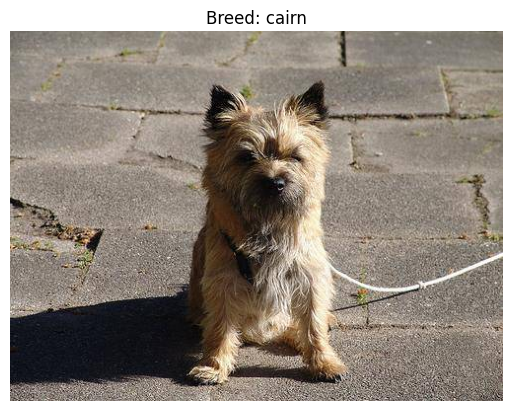

In [33]:
import pandas as pd
import os
import random
from matplotlib import pyplot as plt
from PIL import Image

# Load labels.csv
labels_df = pd.read_csv("labels.csv")

# Set the breed you want to display (e.g. model prediction)
predicted_breed = pred_label

# Filter the dataframe to get all images of the predicted breed
breed_images = labels_df[labels_df['breed'] == predicted_breed]

# Choose a random image ID from the filtered list
if not breed_images.empty:
    image_id = random.choice(breed_images['id'].tolist())
    image_path = os.path.join("train", f"{image_id}.jpg")

    # Load and show the image
    if os.path.exists(image_path):
        img = Image.open(image_path)
        plt.imshow(img)
        plt.title(f"Breed: {predicted_breed}")
        plt.axis('off')
        plt.show()
    else:
        print(f"Image not found: {image_path}")
else:
    print(f"No images found for breed: {predicted_breed}")


In [34]:
test_predictions = model.predict(val_data,
                                      verbose=1)

7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 230ms/step


In [49]:

from keras.models import save_model
# Create the directory if it doesn't exist
save_dir = "./model"
os.makedirs(save_dir, exist_ok=True)

# Full path for saving the model
model_path = os.path.join(save_dir, "1000images.keras")

# Save the model
save_model(model, model_path)



## ***Training a big dog model 🐶 (on the full data)***


In [36]:
len(X), len(y)


(10222, 10222)

In [37]:
# Import train_test_split from Scikit-Learn
from sklearn.model_selection import train_test_split

# Split them into training and validation using NUM_IMAGES
X_train, X_val, y_train, y_val = train_test_split (X,
                                                  y,
                                                  test_size=0.2,
                                                  random_state=42)

len(X_train), len(y_train), len(X_val), len(y_val)

(8177, 8177, 2045, 2045)

In [38]:
train_data = create_data_batches(X_train, y_train)
Val_data = create_data_batches(X_val, y_val, valid_data=True)

Creating training data batches...
Creating validation data batches...


In [39]:
full_model = create_model()


In [40]:
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy",
                                                             patience=3)

In [41]:
full_model.fit(x=train_data,
               epochs=NUM_EPOCHS,
               callbacks=[ full_model_early_stopping])

Epoch 1/100


256/256 ━━━━━━━━━━━━━━━━━━━━ 149s 574ms/step - accuracy: 0.3615 - loss: 2.8765
Epoch 2/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 199s 776ms/step - accuracy: 0.7760 - loss: 0.7241
Epoch 3/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 122s 476ms/step - accuracy: 0.8462 - loss: 0.4816
Epoch 4/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 65s 254ms/step - accuracy: 0.8784 - loss: 0.3739
Epoch 5/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 64s 249ms/step - accuracy: 0.9172 - loss: 0.2770
Epoch 6/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 101s 394ms/step - accuracy: 0.9257 - loss: 0.2249
Epoch 7/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 92s 357ms/step - accuracy: 0.9366 - loss: 0.1896
Epoch 8/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 86s 335ms/step - accuracy: 0.9482 - loss: 0.1563
Epoch 9/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 99s 388ms/step - accuracy: 0.9644 - loss: 0.1247
Epoch 10/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 79s 309ms/step - accuracy: 0.9597 - loss: 0.1250
Epoch 11/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 87s 340ms/step - accuracy: 0.9694 - loss: 0.0980
Epoch 12/100
256

In [42]:
Predictions = full_model.predict(Val_data, verbose=1) # verbose shows us how long there is to go
Predictions

64/64 ━━━━━━━━━━━━━━━━━━━━ 20s 304ms/step


array([[1.43606455e-11, 7.64609124e-16, 3.48089369e-13, ...,
        2.66642316e-11, 1.72358472e-09, 2.17900455e-11],
       [3.10982766e-13, 7.93733136e-07, 8.88045334e-14, ...,
        1.09072853e-12, 6.14916909e-16, 1.03513964e-09],
       [1.71891494e-11, 2.29308288e-08, 4.80620925e-11, ...,
        2.03771139e-10, 4.26149463e-11, 4.15358828e-13],
       ...,
       [2.01623454e-13, 2.82537194e-09, 1.27798466e-12, ...,
        4.43074438e-10, 9.30710383e-14, 4.93454555e-10],
       [2.08724758e-14, 3.78812135e-13, 8.69312109e-13, ...,
        5.51122516e-12, 1.77508843e-16, 4.38806223e-15],
       [5.62402035e-11, 2.83467111e-10, 4.13279411e-09, ...,
        1.04708544e-08, 1.01274803e-13, 3.75915878e-12]], dtype=float32)

In [43]:
import numpy as np

y_Pred = np.argmax(Predictions, axis=1)
y_True = []
for _, labels in Val_data:
    y_True.extend(np.argmax(labels.numpy(), axis=1))
    from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_True, y_Pred)
print(f"Validation Accuracy: {accuracy:.2f}")

Validation Accuracy: 0.80


In [48]:

# Create the directory if it doesn't exist
save_dir = "./model"
os.makedirs(save_dir, exist_ok=True)

# Full path for saving the model
model_path = os.path.join(save_dir, "10000images.keras")

# Save the model
save_model(model, model_path)